In [104]:
import pandas as pd
ames_housing = pd.read_csv("../datasets/house_prices.csv", na_values="?")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]
#"?" as a marker for cells with missing values also known as "null" values.

In [105]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]

In [106]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_validate
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
import numpy as np
#from sklearn.model_selection import ShuffleSplit

#cv = ShuffleSplit(n_splits = 10, test_size= 0.3, random_state=0)


model = make_pipeline(StandardScaler(), SimpleImputer(missing_values=np.nan, strategy='mean'), Ridge())


In [108]:
cv_results = cross_validate(model, data_numerical, target, cv = 10, n_jobs = 2, return_estimator = True)

In [109]:
weights =[est[-1].coef_ for est in cv_results['estimator']]

In [110]:
#max parameters with linear regression were upto a scale of 1e18 hence we used Ridge instead
print(max(max(weight) for weight in weights))
print(min(min(weight) for weight in weights))

22561.85645325165
-13781.812385930034


In [111]:
for weight in weights:
    print(max(weight))

20868.215473229237
20330.3048222674
19764.802441610966
20169.14244525176
19570.048685168844
22561.85645325165
20127.805614522356
20032.776933179226
17143.06969607203
19143.3426945951


In [112]:
# convert the weights into a data frame to find the most loved features by Ridge
weights_df = pd.DataFrame(weights, columns = numerical_features)

<AxesSubplot:>

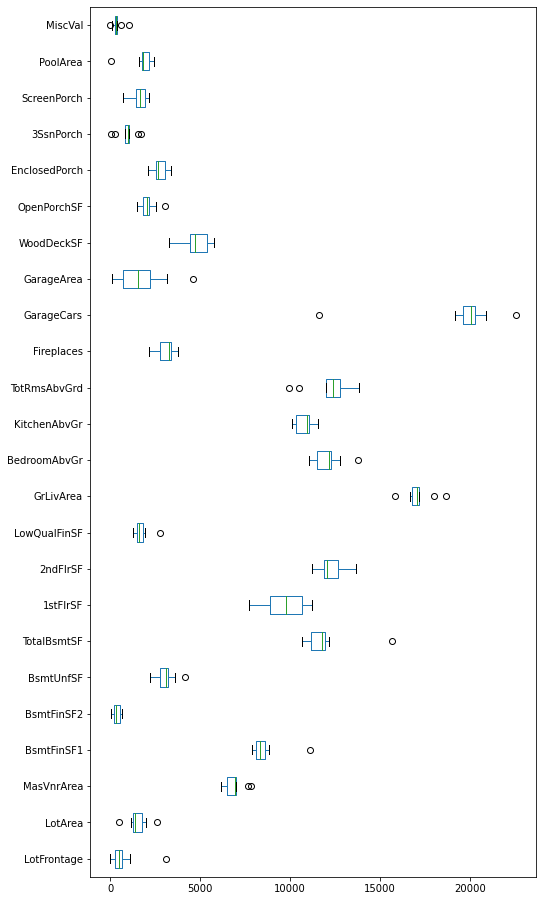

In [113]:
weights_df.abs().plot.box(vert = False, figsize = (8,16))

In [114]:
weights_df.describe().loc[["min", "max"]] #a look at the weights of the features

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
min,-1106.390251,493.241149,6160.174281,7862.675825,-658.138989,2228.279835,10672.328896,7710.158127,11239.294498,-2770.486291,...,2145.289789,11610.608799,-3181.355643,3289.713416,1494.094884,-3392.058947,32.71609,741.077136,-2417.383218,-1050.605437
max,3114.054017,2600.372186,7844.293345,11098.537210,358.864078,4174.361863,15692.315254,11243.761722,13643.834636,-1279.923974,...,3758.108015,22561.856453,4623.099297,5792.154742,3030.373856,-2103.032226,1697.55411,2172.625290,70.601154,608.205089


In [115]:
#removing "GarageArea" to see how the weights are affected 

19964.350894458737
-13916.927512256594


<AxesSubplot:>

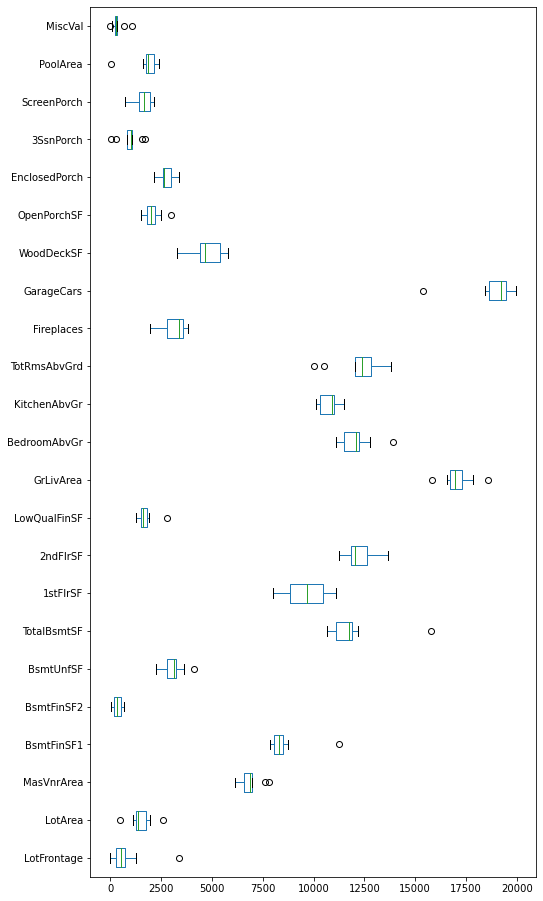

In [116]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]
model = make_pipeline(StandardScaler(), SimpleImputer(missing_values=np.nan, strategy='mean'), Ridge())
cv_results = cross_validate(model, data_numerical, target, cv = 10, n_jobs = 2, return_estimator = True)
weights =[est[-1].coef_ for est in cv_results['estimator']]
print(max(max(weight) for weight in weights))
print(min(min(weight) for weight in weights))
weights_df = pd.DataFrame(weights, columns = numerical_features)
weights_df.abs().plot.box(vert = False, figsize = (8,16)) #abs() for better analyses on effect on weights

In [117]:
alphas=np.logspace(-1, 3, num=30)

In [118]:
# Now, we will search for the regularization strength that will maximize the statistical performance of our predictive mode

17383.869302890256
-12189.671914755303


<AxesSubplot:>

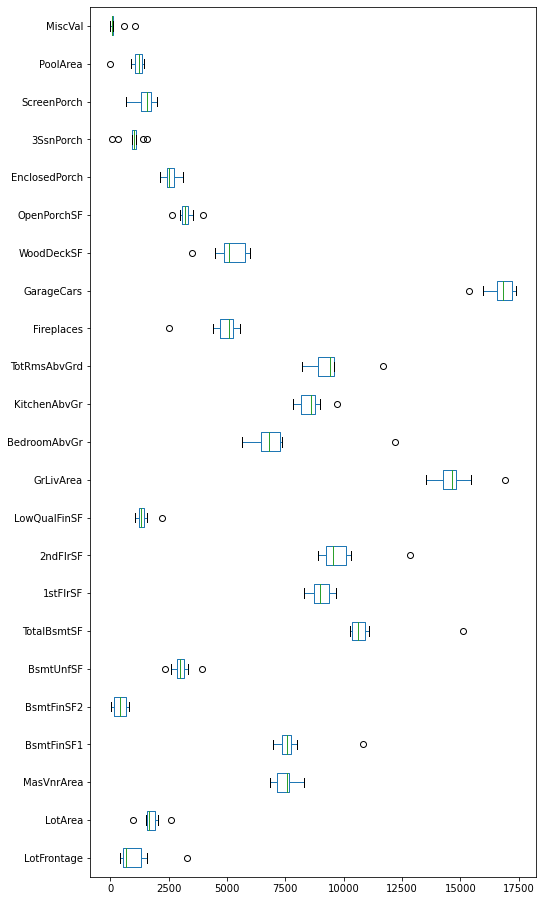

In [119]:
from sklearn.linear_model import RidgeCV
model = make_pipeline(StandardScaler(), SimpleImputer(missing_values=np.nan, strategy='mean'), RidgeCV(alphas=alphas,store_cv_values=True) )
cv_results = cross_validate(model, data_numerical, target, cv = 10, n_jobs = 2, return_estimator = True)
weights =[est[-1].coef_ for est in cv_results['estimator']]
print(max(max(weight) for weight in weights))
print(min(min(weight) for weight in weights))
weights_df = pd.DataFrame(weights, columns = numerical_features)
weights_df.abs().plot.box(vert = False, figsize = (8,16))

In [120]:
#checking the values of Alpha parameter
mse_alphas = [est[-1].cv_values_.mean(axis=0)
              for est in cv_results["estimator"]]
cv_alphas = pd.DataFrame(mse_alphas, columns=alphas)
cv_alphas

,0.100000,0.137382,0.188739,0.259294,0.356225,0.489390,0.672336,0.923671,1.268961,1.743329,...,57.361525,78.804628,108.263673,148.735211,204.335972,280.721620,385.662042,529.831691,727.895384,1000.000000
0,2.057667e+09,2.057646e+09,2.057617e+09,2.057577e+09,2.057522e+09,2.057446e+09,2.057342e+09,2.057200e+09,2.057005e+09,2.056738e+09,...,2.031165e+09,2.023794e+09,2.015410e+09,2.006603e+09,1.998538e+09,1.993146e+09,1.993325e+09,2.003116e+09,2.027893e+09,2.074580e+09
1,2.060912e+09,2.060889e+09,2.060858e+09,2.060816e+09,2.060757e+09,2.060678e+09,2.060568e+09,2.060417e+09,2.060211e+09,2.059929e+09,...,2.032876e+09,2.025053e+09,2.016119e+09,2.006655e+09,1.997815e+09,1.991515e+09,1.990616e+09,1.999086e+09,2.022169e+09,2.066575e+09
2,2.039995e+09,2.039974e+09,2.039945e+09,2.039906e+09,2.039852e+09,2.039778e+09,2.039677e+09,2.039537e+09,2.039347e+09,2.039086e+09,...,2.014410e+09,2.007437e+09,1.999612e+09,1.991569e+09,1.984502e+09,1.980334e+09,1.981883e+09,1.992999e+09,2.018729e+09,2.065522e+09
3,1.928549e+09,1.928527e+09,1.928497e+09,1.928455e+09,1.928398e+09,1.928320e+09,1.928212e+09,1.928065e+09,1.927863e+09,1.927587e+09,...,1.901210e+09,1.893649e+09,1.885084e+09,1.876142e+09,1.868025e+09,1.862695e+09,1.863035e+09,1.873005e+09,1.897829e+09,1.944233e+09
4,1.958794e+09,1.958773e+09,1.958746e+09,1.958708e+09,1.958655e+09,1.958584e+09,1.958485e+09,1.958350e+09,1.958165e+09,1.957911e+09,...,1.933617e+09,1.926601e+09,1.918605e+09,1.910183e+09,1.902426e+09,1.897156e+09,1.897108e+09,1.906091e+09,1.929144e+09,1.972709e+09
5,2.044033e+09,2.044011e+09,2.043981e+09,2.043939e+09,2.043881e+09,2.043802e+09,2.043694e+09,2.043546e+09,2.043342e+09,2.043063e+09,...,2.016320e+09,2.008593e+09,1.999788e+09,1.990512e+09,1.981946e+09,1.976038e+09,1.975664e+09,1.984773e+09,2.008543e+09,2.053597e+09
6,2.030932e+09,2.030911e+09,2.030883e+09,2.030843e+09,2.030790e+09,2.030716e+09,2.030615e+09,2.030476e+09,2.030286e+09,2.030025e+09,...,2.005282e+09,1.998242e+09,1.990310e+09,1.982108e+09,1.974822e+09,1.970386e+09,1.971644e+09,1.982498e+09,2.008080e+09,2.054972e+09
7,2.007722e+09,2.007702e+09,2.007675e+09,2.007637e+09,2.007586e+09,2.007515e+09,2.007419e+09,2.007286e+09,2.007105e+09,2.006856e+09,...,1.983156e+09,1.976373e+09,1.968700e+09,1.960721e+09,1.953569e+09,1.949127e+09,1.950227e+09,1.960843e+09,1.986303e+09,2.033517e+09
8,1.377518e+09,1.377512e+09,1.377505e+09,1.377494e+09,1.377480e+09,1.377460e+09,1.377433e+09,1.377396e+09,1.377345e+09,1.377276e+09,...,1.373219e+09,1.373291e+09,1.374443e+09,1.377574e+09,1.384024e+09,1.395673e+09,1.415072e+09,1.445620e+09,1.491864e+09,1.559910e+09
9,2.088815e+09,2.088793e+09,2.088762e+09,2.088720e+09,2.088662e+09,2.088582e+09,2.088473e+09,2.088323e+09,2.088117e+09,2.087836e+09,...,2.061014e+09,2.053304e+09,2.044522e+09,2.035252e+09,2.026631e+09,2.020539e+09,2.019776e+09,2.028238e+09,2.051119e+09,2.095166e+09


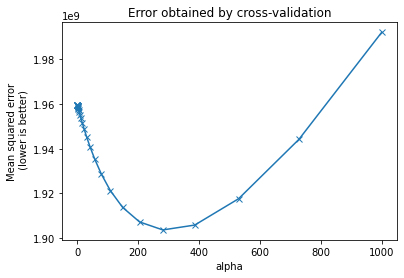

In [122]:
cv_alphas.mean(axis=0).plot(marker="x")
plt.ylabel("Mean squared error\n (lower is better)")
plt.xlabel("alpha")
_ = plt.title("Error obtained by cross-validation")

In [123]:
best_alphas = [est[-1].alpha_ for est in cv_results["estimator"]]
best_alphas

[280.72162039411756,
 385.6620421163472,
 280.72162039411756,
 280.72162039411756,
 385.6620421163472,
 385.6620421163472,
 280.72162039411756,
 280.72162039411756,
 57.361525104486816,
 385.6620421163472]

# Conclusion

we see that alpha is best between 200-400

In [124]:
# Case 2
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.select_dtypes(["integer", "floating"])
data = data.drop(columns=["education-num"])

In [125]:
from sklearn.compose import make_column_selector as selector

In [126]:
numerical_processor = selector(dtype_exclude =object)
numerical_columns = numerical_processor(data)

In [127]:
numerical_columns
data_numerical = data[numerical_columns]

In [128]:
data.isna()

,age,capital-gain,capital-loss,hours-per-week
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
48837,False,False,False,False
48838,False,False,False,False
48839,False,False,False,False
48840,False,False,False,False


In [163]:
from sklearn.linear_model import LogisticRegression
model = make_pipeline(StandardScaler(), LogisticRegression())

cv_results = cross_validate(model, data_numerical, target, cv = 10, n_jobs = 2, return_estimator = True)
weights =[est[-1].coef_[0] for est in cv_results['estimator']]

weights

[array([0.52204276, 2.4667774 , 0.30602977, 0.53963505]),
 array([0.52606692, 2.40653282, 0.30817766, 0.54182433]),
 array([0.52425661, 2.45592287, 0.30812359, 0.54384342]),
 array([0.52037496, 2.45048201, 0.30916996, 0.53459728]),
 array([0.51925928, 2.51201042, 0.30424291, 0.54671495]),
 array([0.52173216, 2.4416315 , 0.30401707, 0.54128619]),
 array([0.52023528, 2.47372277, 0.30689298, 0.53637405]),
 array([0.52395804, 2.44532129, 0.30832579, 0.53825271]),
 array([0.51645436, 2.40508701, 0.30839363, 0.53512121]),
 array([0.51673694, 2.45048914, 0.30139428, 0.53553169])]

In [162]:
data

,age,capital-gain,capital-loss,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
4,18,0,0,30
...,...,...,...,...
48837,27,0,0,38
48838,40,0,0,40
48839,58,0,0,40
48840,22,0,0,20


In [140]:
from sklearn.dummy import DummyClassifier
model = make_pipeline(StandardScaler(), DummyClassifier())

cv_results = cross_validate(model, data_numerical, target, cv = 10, n_jobs = 2, return_estimator = True)



In [142]:
cv_results['test_score'].mean()

0.7607182352166999

In [181]:
adult_census = pd.read_csv("../datasets/adult-census.csv")
target = adult_census["class"]
data = adult_census.drop(columns=["class", "education-num"])

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   marital-status  48842 non-null  object
 4   occupation      48842 non-null  object
 5   relationship    48842 non-null  object
 6   race            48842 non-null  object
 7   sex             48842 non-null  object
 8   capital-gain    48842 non-null  int64 
 9   capital-loss    48842 non-null  int64 
 10  hours-per-week  48842 non-null  int64 
 11  native-country  48842 non-null  object
dtypes: int64(4), object(8)
memory usage: 4.5+ MB


In [203]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
numerical_processor = selector(dtype_exclude =object)
numerical_columns = numerical_processor(data)
data_numerical = data[numerical_columns]
categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(data)



num_preprocessor = StandardScaler()
col_preprocessor =  OneHotEncoder(handle_unknown = "ignore")

preprocessor = ColumnTransformer([('num',num_preprocessor, numerical_columns),('col',col_preprocessor, categorical_columns)])

model = make_pipeline(preprocessor, LogisticRegression())

cv_results = cross_validate(model, data, target, cv = 10, return_estimator= True, n_jobs = 2)
scores = cv_results["test_score"]
print(scores.mean())

0.8516645416236


In [204]:
preprocessor.fit(data)
feature_names = (preprocessor.named_transformers_["col"]
                             .get_feature_names(categorical_columns)).tolist()
feature_names += numerical_columns

In [205]:
feature_names

['workclass_ ?',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Never-worked',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_ 10th',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'marital-status_ Divorced',
 'marital-status_ Married-AF-spouse',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Married-spouse-absent',
 'marital-status_ Never-married',
 'marital-status_ Separated',
 'marital-status_ Widowed',
 'occupation_ ?',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Fa

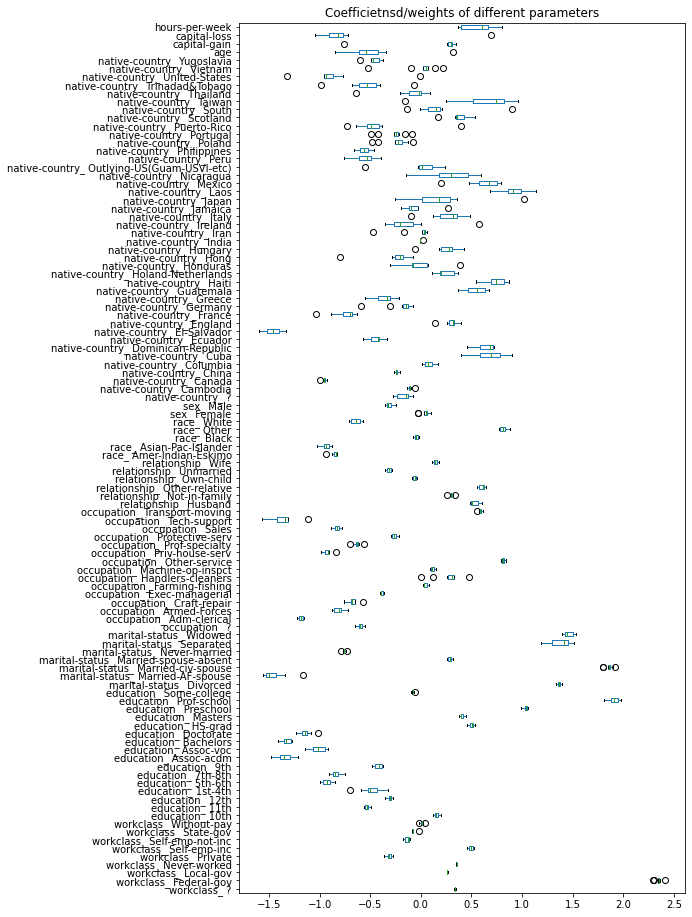

In [208]:
#checking the weights of all features
coeffs = []
for est in cv_results['estimator']:
    coeffs.append(est[-1].coef_[0] )

first_fold = cv_results['estimator'][0]
#as names of the features will not change
weight_data = pd.DataFrame(coeffs, columns = feature_names)
weight_data.plot.box(vert= False, figsize = (8,16))
_=plt.title('Coefficietnsd/weights of different parameters')

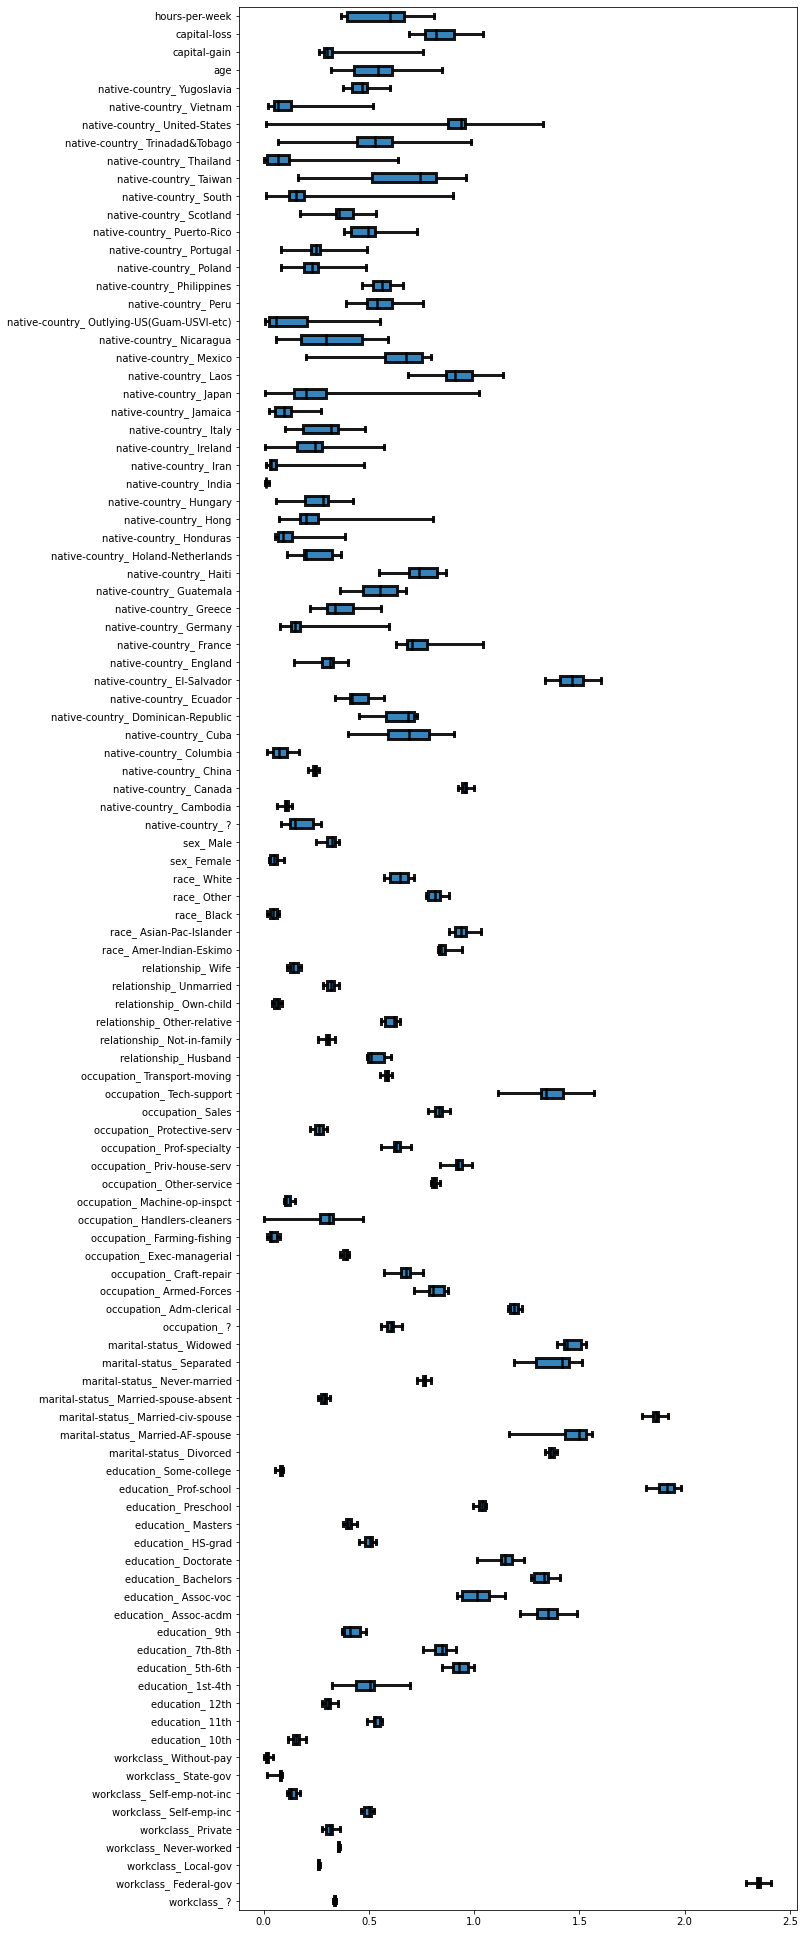

In [209]:
#better boxplot
coefs = [estimator[-1].coef_[0] for estimator in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=feature_names)

# Define the style of the box style
boxplot_property = {
    "vert": False,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}

_, ax = plt.subplots(figsize=(10, 35))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)

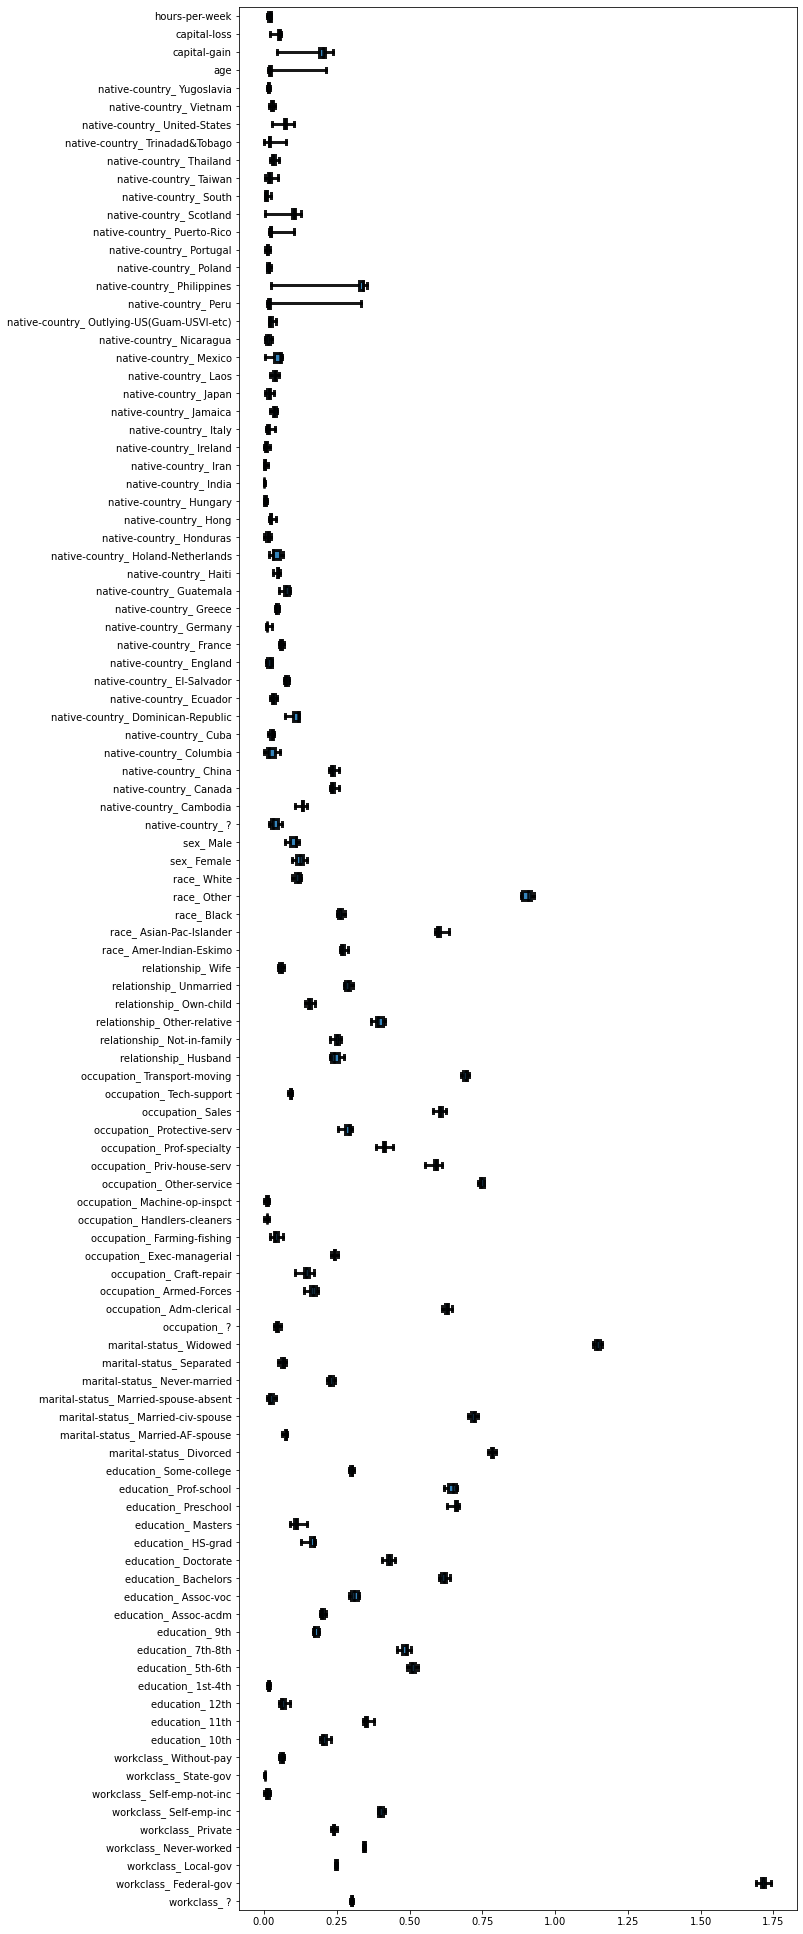

In [212]:
#random C= 0.01
model = make_pipeline(
    preprocessor, LogisticRegression(C=0.01, max_iter=5000)
)
cv_results = cross_validate(
    model, data, target, cv=10, return_estimator=True, n_jobs=2
)
coefs = [estimator[-1].coef_[0] for estimator in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=feature_names)
_, ax = plt.subplots(figsize=(10, 35))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)